In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# size 28*28, 60000 pictures in mnist train set
X_train.shape

(60000, 28, 28)

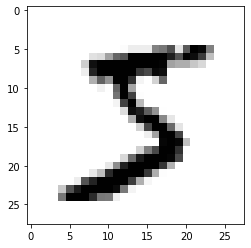

In [4]:
plt.imshow(X_train[0], cmap='binary')

In [5]:
# modeling
# now X_train shape is (60000, 28, 28)
# but we need (60000, 28, 28, 1) shape
# 60000-> pictures, 28->row, 28->columns, 1->color(black/white)

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# scaling
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=1, activation='relu', input_shape=(28,28,1,)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='valid', strides=1, activation='relu',))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 311,182
Trainable params: 311,182
Non-trainable params: 0
_________________________________________________________________


In [8]:
# loss/optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train, batch_size=200, epochs=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 81s 2ms/step - loss: 0.2728 - acc: 0.9197 - val_loss: 0.0831 - val_acc: 0.9762


In [9]:
score = model.evaluate(X_test, y_test)
score

10000/10000 [==============================] - 6s 616us/step


[0.06721729339547455, 0.9785]

In [10]:
'''Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          14436     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
Total params: 311,182
Trainable params: 311,182
Non-trainable params: 0
_________________________________________________________________'''

L1 = model.get_layer('conv2d_1')
L1.get_weights()[0].shape




(5, 5, 1, 16)

In [11]:
def plot_weight(w):
    
    w_min = np.min(w)
    w_max = np.max(w)

    num_grid = math.ceil(math.sqrt(w.shape[3]))
    
    fix, axis = plt.subplots(num_grid, num_grid)
    
    for i, ax in enumerate(axis.flat):
        if i < w.shape[3]:
            img = w[:,:,0,i]
            ax.imshow(img, vmin=w_min, vmax=w_max)
    
    plt.show()

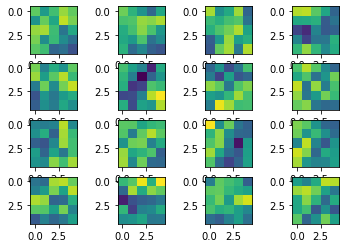

In [12]:
L1 = model.get_layer('conv2d_1')
w1 = L1.get_weights()[0]
plot_weight(w1)

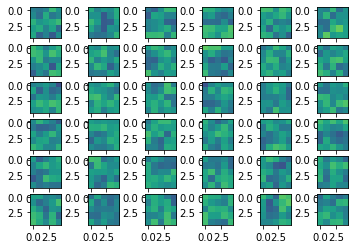

In [13]:
L2 = model.get_layer('conv2d_2')
w2 = L2.get_weights()[0]
plot_weight(w2)

In [14]:
# load completed learning set
temp_model = Model(inputs=model.get_layer('conv2d_1').input, outputs=model.get_layer('conv2d_1').output)
output = temp_model.predict(X_test)

In [15]:
output.shape

(10000, 24, 24, 16)

In [16]:
def plot_output(output):

    num_grid = math.ceil(math.sqrt(output.shape[3]))
    
    fix, axis = plt.subplots(num_grid, num_grid)
    
    for i, ax in enumerate(axis.flat):
        if i < output.shape[3]:
            img = output[0,:,:,i]
            ax.imshow(img, cmap='binary')
    
    plt.show()

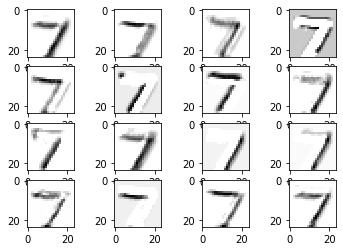

In [17]:
plot_output(output)

In [18]:
temp_model = Model(inputs=model.get_layer('conv2d_1').input, outputs=model.get_layer('dense_2').output)
output = temp_model.predict(X_test)
r = random.randint(0, y_test.shape[0])
print('label:', np.argmax(y_test[r]))
print('prediction:', np.argmax(output[r]))

label: 9
prediction: 9


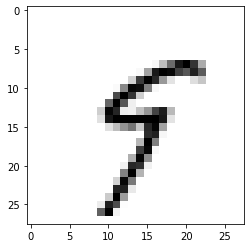

In [19]:
plt.imshow(X_test[r].reshape(28,28), cmap='binary')